# Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 
from fastai.metrics import error_rate

In [3]:
batch_size = 64

# Loading Data

In [23]:
! 

fungi classification.ipynb


In [28]:
data_path_str = "data/fgvcx_fungi_comp_train"

In [29]:
doc(untar_data)

In [30]:
data_path = untar_data(data_path_str); data_path

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train')

In [31]:
data_path.ls()[:5]

[PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train/67347_Gliophorus_irrigatus'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train/13598_Entoloma_exile'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train/60665_Diatrype_decorticata'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train/14610_Helvella_elastica'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train/64651_Hymenoscyphus_fraxineus')]

In [32]:
# file_names = get_

In [33]:
# pattern = r'(^\d*)'

In [34]:
# pattern = r'/([^/]+)_\d+.jpg$'
# pattern = re.compile(pattern)

Check that pattern works

In [35]:
# test_path = str(file_names[1])
# print(test_path)
# pattern.search(test_path).group(1)

In [36]:
data = ImageDataBunch.from_folder(
    data_path,
    size = 224,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

# Visualize Data

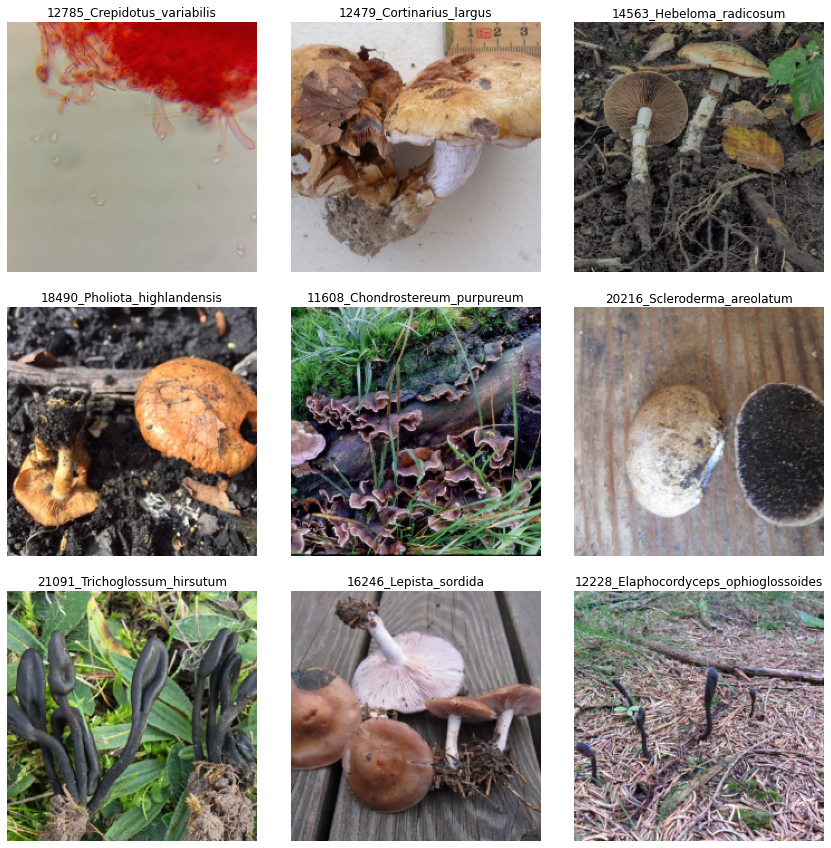

In [37]:
data.show_batch(3)

In [38]:
type(data)

fastai.vision.data.ImageDataBunch

In [39]:
data.c

1394

In [40]:
data.classes

['10000_Abortiporus_biennis',
 '10025_Achroomyces_disciformis',
 '10052_Agaricus_altipes',
 '10056_Agaricus_arvensis',
 '10057_Agaricus_augustus',
 '10059_Agaricus_bernardii',
 '10061_Agaricus_bisporus',
 '10062_Agaricus_bitorquis',
 '10065_Agaricus_campestris',
 '10068_Agaricus_comtulus',
 '10069_Agaricus_cupreobrunneus',
 '10079_Agaricus_impudicus',
 '10082_Agaricus_langei',
 '10083_Agaricus_lanipes',
 '10085_Agaricus_litoralis',
 '10090_Agaricus_moelleri',
 '10097_Agaricus_porphyrizon',
 '10106_Agaricus_dulcidulus',
 '10107_Agaricus_sylvaticus',
 '10108_Agaricus_sylvicola',
 '10111_Agaricus_subfloccosus',
 '10112_Agaricus_subperonatus',
 '10116_Agaricus_xanthodermus',
 '10120_Agrocybe_arvalis',
 '10123_Agrocybe_dura',
 '10127_Agrocybe_pediades',
 '10128_Agrocybe_praecox',
 '10158_Aleuria_aurantia',
 '10174_Aleurodiscus_amorphus',
 '10225_Amanita_ceciliae',
 '10227_Amanita_crocea',
 '10230_Amanita_excelsa',
 '10232_Amanita_franchetii',
 '10234_Amanita_fulva',
 '10235_Amanita_gemmata'

In [41]:
from itertools import groupby

In [42]:
data.y.items

array([1357, 1357, 1357, 1357, ...,  342,  342,  342,  342])

In [43]:
CategoryList(data.y.items, data.y.classes)

CategoryList (71808 items)
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: .

In [47]:
data.y.classes[data.y.items[0]]

'67347_Gliophorus_irrigatus'

In [48]:
labels = [data.y.classes[value] for value in data.y.items]

In [52]:
label_freq = {key: len(list(group)) for key, group in groupby(labels)}

In [53]:
min(label_freq, key=label_freq.get)

'15877_Lactarius_mammosus'

In [54]:
label_freq

{'67347_Gliophorus_irrigatus': 70,
 '13598_Entoloma_exile': 23,
 '60665_Diatrype_decorticata': 39,
 '14610_Helvella_elastica': 53,
 '64651_Hymenoscyphus_fraxineus': 17,
 '18475_Phleogena_faginea': 22,
 '17963_Panellus_mitis': 58,
 '19964_Russula_emetica': 29,
 '45206_Mycena_galopus var. nigra': 28,
 '15468_Inocybe_rimosa': 111,
 '11866_Coltricia_confluens': 21,
 '18925_Pluteus_umbrosus var. umbrosus ': 50,
 '20829_Tapinella_panuoides': 59,
 '63806_Antrodiella_faginea': 5,
 '12479_Cortinarius_largus': 170,
 '12785_Crepidotus_variabilis': 78,
 '18712_Phyllotopsis_nidulans': 18,
 '14069_Fuligo_leviderma': 7,
 '11575_Chamaemyces_fracidus': 5,
 '63641_Hygrocybe_miniata': 131,
 '44721_Mycetinis_querceus': 21,
 '61211_Coprinellus_xanthothrix': 40,
 '11286_Calyptella_gibbosa': 7,
 '20225_Scleroderma_verrucosum': 83,
 '15328_Inocybe_bongardii': 14,
 '18329_Phaeolus_schweinitzii': 130,
 '60939_Sarcomyxa_serotina': 66,
 '17150_Morchella_conica': 12,
 '61650_Tricholoma_frondosae': 27,
 '19919_Russ

<BarContainer object of 1394 artists>

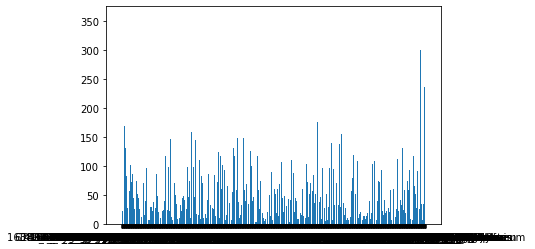

In [55]:
plt.bar(label_freq.keys(), label_freq.values())

# Training the model

In [56]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [57]:
# fit_one_cycle(learner, 3)

In [58]:
# learner.save("fungi_resnet34_stage1")

# Analyzing results

In [59]:
learner.load("fungi_resnet34_stage1")

Learner(data=ImageDataBunch;

Train: LabelList (71808 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train;

Valid: LabelList (17952 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
20696_Stropharia_coronilla,21145_Tricholoma_sejunctum,11825_Clitopilus_prunulus,11797_Clitocybe_phyllophila,17272_Mycena_pelianthina
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/fgvcx_fungi_comp_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [21]:
results = ClassificationInterpretation.from_learner(learner)

In [35]:
results.most_confused()

[('63366_Flammulina_elastica',
  '14056_Flammulina_velutipes var. velutipes',
  15),
 ('14432_Gymnopus_aquosus', '14435_Gymnopus_dryophilus', 13),
 ('11086_Xerocomellus_pruinatus', '11082_Xerocomellus_chrysenteron', 11),
 ('11101_Xerocomus_subtomentosus', '40854_Xerocomus_ferrugineus', 11),
 ('14175_Geastrum_fimbriatum', '14190_Geastrum_michelianum', 11),
 ('10116_Agaricus_xanthodermus', '10056_Agaricus_arvensis', 9),
 ('10263_Amanita_rubescens var. rubescens', '63479_Amanita_rubescens', 9),
 ('14155_Ganoderma_adspersum', '14160_Ganoderma_pfeifferi', 9),
 ('21103_Tricholoma_argyraceum', '21143_Tricholoma_scalpturatum', 9),
 ('61279_Xerocomellus_cisalpinus', '11082_Xerocomellus_chrysenteron', 9),
 ('63639_Hygrocybe_conica', '14833_Hygrocybe_conica var. conica', 9),
 ('65745_Suillellus_luridus', '67628_Sutorius_luridiformis', 9),
 ('12446_Cortinarius_hemitrichus', '12426_Cortinarius_flexipes', 8),
 ('12979_Dacrymyces_lacrymalis', '12985_Dacrymyces_stillatus', 8),
 ('14062_Fomes_fomentari

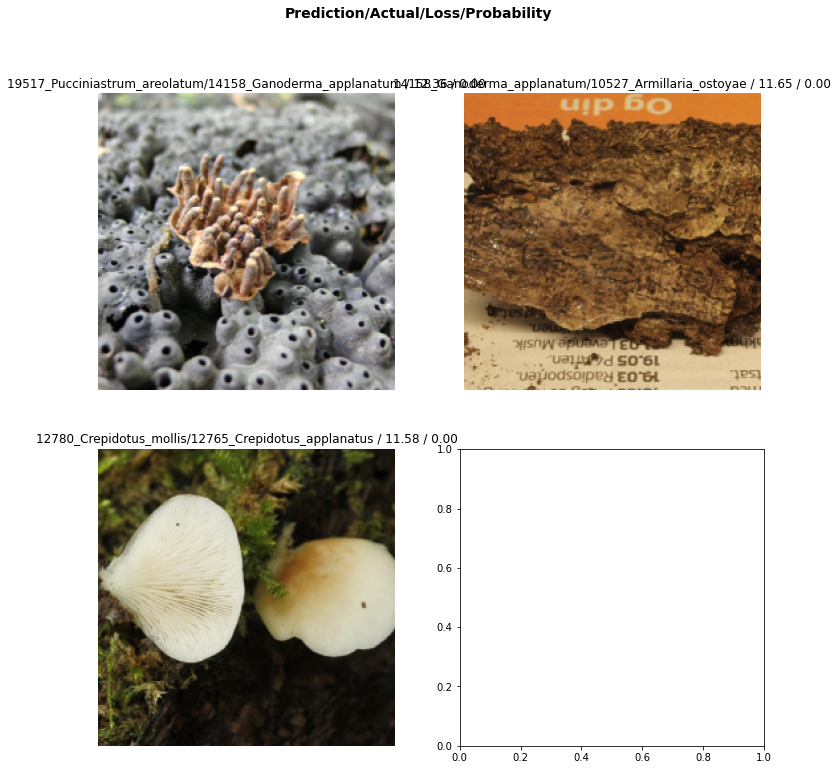

In [24]:
results.plot_top_losses(3)

In [25]:
results.preds

tensor([[9.8146e-05, 3.1096e-04, 5.4617e-05,  ..., 5.7492e-03, 8.5086e-05,
         5.9283e-05],
        [2.8540e-05, 1.1141e-04, 6.6461e-05,  ..., 1.2813e-05, 6.3935e-05,
         5.1289e-04],
        [3.1273e-04, 1.0898e-04, 8.8368e-05,  ..., 1.6730e-04, 2.3542e-05,
         1.4350e-05],
        ...,
        [3.0437e-04, 2.1834e-04, 3.6063e-05,  ..., 3.5513e-05, 8.7207e-05,
         4.2622e-04],
        [3.8310e-03, 1.0121e-05, 8.0992e-06,  ..., 8.9388e-04, 5.3032e-06,
         9.8211e-05],
        [9.6094e-05, 4.5393e-05, 1.5421e-05,  ..., 4.2943e-04, 3.8506e-05,
         5.4189e-04]])

# Prediction

In [60]:
test = ImageList.from_folder("data/fgvcx_fungi_comp_test")

In [70]:
test

ImageList (9758 items)
Image (3, 768, 1024),Image (3, 576, 770),Image (3, 517, 690),Image (3, 806, 539),Image (3, 754, 1024)
Path: data/fgvcx_fungi_comp_test

In [84]:
learner.validate= test[0]

In [85]:
?learner.get_preds

In [86]:
preds, _ = learner.get_preds(ds_type=DatasetType.Valid)

KeyboardInterrupt: 

In [80]:
len(preds)

17952

In [63]:
?load_learner

TODO:

1. Imports
2. Load Data
3. Visualize data
4. Train model
5. Make improvements